##### Creating a Symbolic Regresion Model for Nuclear Data such as Charge Radii and AME

In [2]:
import pandas as pd
import numpy as np
import pysr
import sympy
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [8]:
file='/Users/athulkunjipurayil/Desktop/NuclearPhysics/nuclear2013.txt'
dfun = pd.read_csv(file, sep=',', header=0)
select = np.isnan(dfun['radius_val'])
select = select == False
df2013 = dfun[select]
file2 = '/Users/athulkunjipurayil/Desktop/NuclearPhysics/nuclear2021.csv'
df2021 = pd.read_csv(file2, header=1)
df2021 = df2021[(df2021['In CR2013'] == 'No') ]
df2021.reset_index(drop=True)
df2013_selected = df2013[[ 'Z', 'symbol', 'A', 'N',  'radius_val', 'radius_unc']]
df2021_selected = df2021[[ 'Z', 'symbol', 'A', 'N',  'radius_val', 'radius_unc']]
concatenated_df = pd.concat([df2013_selected, df2021_selected], ignore_index=True)
df= concatenated_df

A = concatenated_df['A'].to_numpy()  # Extract 'A' column as NumPy array
Z = concatenated_df['Z'].to_numpy()  
N = concatenated_df['N'].to_numpy() 

Rvalue = concatenated_df['radius_val'].to_numpy()  # Extract 'radius_val' column as NumPy array

# df
# plt.scatter(A, Rvalue_2013)

,Z,symbol,A,N,radius_val,radius_unc
0,0,n,1,1,-0.1149,0.0027
1,1,H,1,0,0.8783,0.0086
2,1,H,2,1,2.1421,0.0088
3,1,H,3,2,1.7591,0.0363
4,2,He,3,1,1.9661,0.0030
...,...,...,...,...,...,...
1034,87,Fr,204,117,5.5390,0.0183
1035,87,Fr,205,118,5.5476,0.0182
1036,87,Fr,206,119,5.5485,0.0182
1037,88,Ra,231,143,5.7850,0.0193


In [3]:
X=A
X = A.reshape(-1, 1) #feature
y = Rvalue    #target

In [10]:
default_pysr_params = dict(
    populations=10,
    model_selection="best",
)

model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*",],
    unary_operators=["exp", "sin", "myf(x)= abs(x)^(1//3)"],
    extra_sympy_mappings={ 
    'myf': lambda x: sympy.Pow(abs(x), 1/3)
    },
    **default_pysr_params,
)

model.fit(X, y)

model.sympy()

/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


exp(exp(sin(sin(sin(0.455988661718535*Abs(x1)**0.333333333333333)))))

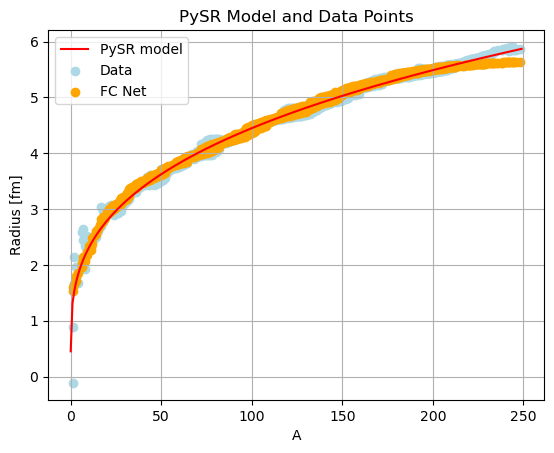

In [16]:
A_value = np.arange(0, 250)  # Range for A_value
y_values = A_value**(1/3) * 0.8612992 + 0.45152017

plt.plot(A_value, y_values, color="red", label="PySR model")

plt.scatter(A, Rvalue, color="lightblue", label="Data")

file_path = "model_results.csv"

loaded_df = pd.read_csv(file_path)
plt.scatter(loaded_df['A'], loaded_df['model_predictions'], color="orange", label=r"FC Net")

plt.xlabel("A")
plt.ylabel("Radius [fm]")
plt.title("PySR Model and Data Points")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()


##### Implement  more terms 

In [20]:
# Combine A, Z, N into a single matrix X
X = np.column_stack((A, Z, N))  # Shape will be (n_samples, 3)

# Reshape X to ensure features are in the correct form
X = X.reshape(-1, 3)  # No change in shape, 
y = Rvalue    #target



model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*",],
    unary_operators=["exp", "sin", "myf(x)= abs(x)^(1//3)"],
    extra_sympy_mappings={ 
    'myf': lambda x: sympy.Pow(abs(x), 1/3)
    },
    **default_pysr_params,
)

model.fit(X, y)

# model.sympy()

/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                            myf(x0)   
	1         0.906843                                       myf(x1 + x1)   
	2         0.173510                          myf(x1 + (x1 + 2.773574))   
	3         0.092693                           myf(x1 + (x1 + myf(x1)))   
	4         0.049268            myf((0.42151424 * x0) + (x1 + myf(x1)))   
	5         0.047831       myf((sin(0.42151424) * x0) + (x1 + myf(x1)))   
	6         0.076014  myf(((x0 * 0.06169642) + (myf(x1) + x1)) * 1.6...   
	7   >>>>  0.094595  myf((0.42151424 * x0) + (x1 + (myf(myf(x1)) * ...   
	8         0.040392  myf((sin(myf(x1)) + (x1 + myf(x1))) + (0.42151...   
	9         0.018319  myf((myf(x1) + (sin(myf(x1)) + x1)) + (sin(0.4...   
	10        0.072048  myf((myf(x1) + (exp(sin(myf(x1))) + x1)) + (si...   
	11        0.001162  myf((myf(x1) + (exp(sin(myf(x1 * 0.9367184))) ...   
	
	        loss  complexity  
	0   0.072777           2  
	1   0.011867           4  
	2   0.008387           6  
	3   0.007645           7  
	4   0.006927           9  
	5   0.006604          10  
	6   0.006120          11  
	7   0.005568          12  
	8   0.005348          13  
	9   0.005250          14  
	10  0.004885          15  
	11  0.004874          17  
]

In [19]:
X

array([[  1,   0,   1],
       [  1,   1,   0],
       [  2,   1,   1],
       ...,
       [206,  87, 119],
       [231,  88, 143],
       [233,  88, 145]])

##### Nuclear Mass and Binding energy

In [11]:
file='/Users/athulkunjipurayil/Desktop/NuclearPhysics/AME2020.txt'
dfun = pd.read_csv(file, sep=',', header=0)
# select = np.isnan(dfun['bindingE'])
# select = select == False
dfun = dfun[dfun['bindingE'] != -999]

df2020 = dfun#[select]

df= df2020[[ 'name','N','Z','A','Mexcess','eMexcess','bindingE','ebindingE','betaE','ebetaE','atomicM','eatomticM']]

A = df['A'].to_numpy()  # Extract 'A' column as NumPy array
Z = df['Z'].to_numpy()  
N = df['N'].to_numpy()  

BE = df['bindingE'].to_numpy() 

df


,name,N,Z,A,Mexcess,eMexcess,bindingE,ebindingE,betaE,ebetaE,atomicM,eatomticM
0,Rn,122,86,208,-9.655000,1.016300e-02,7.794268,4.900000e-05,-6.990,0.015466,207.989635,1.091000e-02
1,Ho,84,67,151,-63.620000,8.298000e-03,8.145527,5.500000e-05,-5.356,0.018442,150.931698,8.908000e-03
2,Pr,72,59,131,-74.300000,4.699500e-02,8.286144,3.590000e-04,-6.533,0.053081,130.920235,5.045100e-02
3,Au,115,79,194,-32.210000,2.118000e-03,7.918774,1.100000e-05,-0.028,0.003581,193.965419,2.273000e-03
4,Ta,94,73,167,-48.350000,2.794500e-02,8.018861,1.670000e-04,-6.258,0.033626,166.948093,3.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
3546,Mo,54,42,96,-88.790000,1.200000e-04,8.653988,1.000000e-06,-2.973,0.005145,95.904675,1.280000e-04
3548,O,8,8,16,-4.737000,3.000000e-07,7.976207,2.000000e-07,-15.410,0.005364,15.994915,3.200000e-07
3552,Sc,18,21,39,-14.170000,2.400000e-02,8.013458,6.150000e-04,-999.000,-999.000000,38.984785,2.576500e-02
3553,Mn,27,25,52,-50.710000,1.290000e-04,8.670409,3.000000e-06,-2.379,0.000153,51.945559,1.380000e-04


In [17]:
# Combine A, Z, N into a single matrix X
X = np.column_stack((A, Z))  # Shape will be (n_samples, 3)

# Reshape X to ensure features are in the correct form
X = X.reshape(-1, 2)  # No change in shape, 
y = BE    #target

model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*",],
    unary_operators=["incbrt(x)= abs(x)^(-1//3)",   "p2(x)= abs(x)^(2)", "cbr4(x)= abs(x)^(-4//3)"],
    extra_sympy_mappings={ 
    'cbr4': lambda x: sympy.Pow(abs(x), -4/3),
    'incbrt': lambda x: sympy.Pow(abs(x), -1/3),
    'p2': lambda x: sympy.Pow(abs(x), 2),
    },
    **default_pysr_params,
)

model.fit(X, y)

# model.sympy()

/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                  incbrt(-0.443473)   
	1         4.439532                               4.231866 + 3.8128512   
	2         0.017411                  (-1.133315 * cbr4(x0)) + 8.038451   
	3         0.074331           p2(-2.8362687) + (cbr4(x0) * -2.8362687)   
	4         0.073512     8.038451 + (cbr4(x0 * -0.309058) * -0.9906004)   
	5         0.083612  (cbr4(incbrt(3.6827393)) * 4.5437694) + (-13.0...   
	6   >>>>  0.116965  p2(incbrt((0.13370758 * p2(-0.7233944)) + cbr4...   
	7         0.031436  (incbrt(p2((p2(x1) * 0.34194058) + -0.17162998...   
	8         0.014194  p2(incbrt(cbr4(x0) + (p2(-0.7233944) * 0.13370...   
	9         0.092173  (incbrt(p2((p2(x1 * x1) * p2(0.09018448)) + -1...   
	10        0.005929  p2(incbrt(cbr4(x0) + (p2(-0.7233944) * 0.13370...   
	
	         loss  complexity  
	0   45.879215           2  
	1    0.541442           3  
	2    0.513887           6  
	3    0.477074           7  
	4    0.443261           8  
	5    0.375004          10  
	6    0.333610          11  
	7    0.313281          13  
	8    0.304512          15  
	9    0.277699          16  
	10   0.274426          18  
]

In [19]:
model.sympy() 
# predictions = model.predict(X)

Abs(Abs(x0)**(-1.33333333333333) + 0.13370758*0.52329945795136)**(-0.666666666666667) + 2.144578

/var/folders/53/r820nqns0xx4qpbkjmspw8100000gn/T/ipykernel_98830/672851946.py:2: RuntimeWarning: divide by zero encountered in power
  y_values = (A_value**(-4/3)*-0.23505953) + 8.0222645


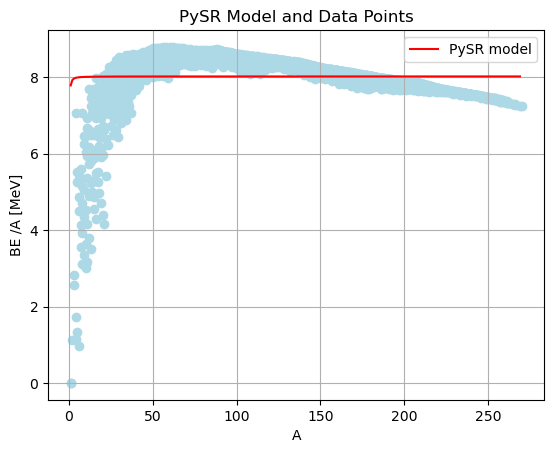

In [16]:
A_value = np.arange(0, 270)  # Range for A_value
y_values = (A_value**(-4/3)*-0.23505953) + 8.0222645  

plt.plot(A_value, y_values, color="red", label="PySR model")

plt.scatter(A, BE, color='lightblue')

plt.xlabel("A")
plt.ylabel("BE /A [MeV]")
plt.title("PySR Model and Data Points")
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()

In [91]:
A.max()

270